### 1. Can we use Bagging for regression problems?
Yes. Bagging can be applied to both **classification and regression problems**. For regression, models like `DecisionTreeRegressor` are typically used in a Bagging Regressor.

---

### 2. What is the difference between multiple model training and single model training?
- **Single model training**: Train one model on the entire dataset. Predictions rely solely on this model.  
- **Multiple model training**: Train several models (often on bootstrapped samples), then **aggregate their predictions**. This usually improves accuracy and reduces variance.

---

### 3. Explain the concept of feature randomness in Random Forest
Random Forest introduces **feature randomness** by selecting a random subset of features at each split while building each tree. This reduces correlation between trees and improves generalization.

---

### 4. What is OOB (Out-of-Bag) Score?
- When using **bootstrap sampling**, some samples are **not selected** for a tree (out-of-bag samples).  
- The **OOB score** is the model accuracy measured on these unused samples.  
- It provides a **built-in validation** without needing a separate test set.

---

### 5. How can you measure the importance of features in a Random Forest model?
- **Feature importance** can be measured based on:
  1. **Mean decrease in impurity (Gini or entropy)**
  2. **Permutation importance** (effect on model accuracy when the feature values are shuffled)

---

### 6. Explain the working principle of a Bagging Classifier
1. Take **bootstrap samples** from the training data.  
2. Train a **base classifier** (e.g., Decision Tree) on each sample.  
3. Aggregate predictions using **majority voting** (for classification) or averaging (for regression).  

---

### 7. How do you evaluate a Bagging Classifier’s performance?
- Use metrics like:
  - **Accuracy**, **Precision**, **Recall**, **F1-score** for classification  
  - **Cross-validation** or **OOB score** for internal evaluation  

---

### 8. How does a Bagging Regressor work?
1. Bootstrap samples of the dataset are created.  
2. Train a base regressor (e.g., Decision Tree) on each sample.  
3. Aggregate predictions by **averaging** to reduce variance.

---

### 9. What is the main advantage of ensemble techniques?
- **Improved accuracy and generalization**  
- **Reduction in overfitting** by combining multiple models

---

### 10. What is the main challenge of ensemble methods?
- **Increased computational cost** (training multiple models)  
- **Reduced interpretability**, especially with large ensembles

---

### 11. Explain the key idea behind ensemble techniques
- Combine **multiple models** to get a **better overall prediction** than any single model.  
- The ensemble reduces **variance, bias, or both**, depending on the method.

---

### 12. What is a Random Forest Classifier?
- An ensemble of **Decision Trees** where:
  - Each tree is trained on a **bootstrap sample**  
  - Each split uses a **random subset of features**  
- Predictions are aggregated using **majority voting**.

---

### 13. What are the main types of ensemble techniques?
1. **Bagging** (Bootstrap Aggregating) – reduces variance  
2. **Boosting** – reduces bias (e.g., AdaBoost, XGBoost)  
3. **Stacking** – combines different types of models

---

### 14. What is ensemble learning in machine learning?
- **Ensemble learning** is a technique where multiple models are trained and combined to **solve the same problem**, improving **accuracy and robustness**.

---

### 15. When should we avoid using ensemble methods?
- When:
  - **Interpretability** is important  
  - Dataset is **small** (ensemble may overfit)  
  - **Computational resources** are limited

---

### 16. How does Bagging help in reducing overfitting?
- By training models on **different bootstrap samples** and aggregating results, Bagging **reduces model variance**, which decreases overfitting.

---

### 17. Why is Random Forest better than a single Decision Tree?
- Random Forest:
  - Reduces **overfitting** of single trees  
  - Is **more robust** to noise  
  - Provides **feature importance metrics**  
- Single Decision Tree is prone to **high variance**.

---

### 18. What is the role of bootstrap sampling in Bagging?
- Bootstrap sampling creates **different subsets** of data by sampling **with replacement**.  
- It ensures each model in the ensemble sees a **slightly different dataset**, increasing diversity.

---

### 19. What are some real-world applications of ensemble techniques?
- **Finance**: Credit scoring, fraud detection  
- **Healthcare**: Disease prediction, medical imaging  
- **Marketing**: Customer churn prediction  
- **Industry**: Fault detection, demand forecasting

---

### 20. What is the difference between Bagging and Boosting?
| Aspect | Bagging | Boosting |
|--------|---------|----------|
| Goal | Reduce **variance** | Reduce **bias** |
| Model training | Parallel (independent) | Sequential (depends on previous errors) |
| Sample weighting | Equal | Misclassified samples get higher weight |
| Examples | Random Forest, Bagging Classifier | AdaBoost, XGBoost |

---


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
print("1. Bagging Classifier with Decision Trees")

1. Bagging Classifier with Decision Trees


In [5]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [7]:
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [8]:
y_pred = bag_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

Accuracy: 0.956140350877193 



In [9]:
print("2. Bagging Regressor with Decision Trees")


2. Bagging Regressor with Decision Trees


In [10]:
reg_data = fetch_california_housing()
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reg_data.data, reg_data.target, test_size=0.2, random_state=42)


In [11]:
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train_r, y_train_r)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [12]:
y_pred_r = bag_reg.predict(X_test_r)
print("Mean Squared Error (MSE):", mean_squared_error(y_test_r, y_pred_r), "\n")


Mean Squared Error (MSE): 0.2572988359842641 



In [13]:
print("3. Random Forest Classifier Feature Importance")


3. Random Forest Classifier Feature Importance


In [14]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
importances = rf_clf.feature_importances_
for feature, imp in zip(data.feature_names, importances):
    print(f"{feature}: {imp:.4f}")
print()

mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052



In [16]:
print("4. Random Forest Regressor vs Decision Tree")

4. Random Forest Regressor vs Decision Tree


In [17]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_r, y_train_r)

DecisionTreeRegressor(random_state=42)

In [18]:
y_pred_dt = dt_reg.predict(X_test_r)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)


In [20]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)


RandomForestRegressor(random_state=42)

In [21]:
y_pred_rf = rf_reg.predict(X_test_r)
mse_rf = mean_squared_error(y_test_r, y_pred_rf)

In [22]:
print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf, "\n")

Decision Tree MSE: 0.495235205629094
Random Forest MSE: 0.2553684927247781 



In [23]:
print("5. OOB Score for Random Forest Classifier")


5. OOB Score for Random Forest Classifier


In [24]:
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [25]:
print("OOB Score:", rf_oob.oob_score_, "\n")


OOB Score: 0.9560439560439561 



In [26]:
print("6. Bagging Classifier with SVM")


6. Bagging Classifier with SVM


In [28]:
bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(probability=True), random_state=42)

In [29]:
y_pred_svm = bag_svm.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm), "\n")

Accuracy: 0.9473684210526315 



In [31]:
print("7. Random Forest with Different Number of Trees")

7. Random Forest with Different Number of Trees


In [32]:
for n in [10, 50, 100, 200]:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf_temp.predict(X_test))
    print(f"n_estimators={n} => Accuracy: {acc:.4f}")
print()


n_estimators=10 => Accuracy: 0.9561
n_estimators=50 => Accuracy: 0.9649
n_estimators=100 => Accuracy: 0.9649
n_estimators=200 => Accuracy: 0.9649



In [33]:
print("8. Bagging Classifier with Logistic Regression")


8. Bagging Classifier with Logistic Regression


In [35]:
bag_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50, random_state=42)
bag_lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50,
                  random_state=42)

In [36]:
y_pred_prob = bag_lr.predict_proba(X_test)[:,1]
print("AUC Score:", roc_auc_score(y_test, y_pred_prob), "\n")

AUC Score: 0.9980347199475925 



In [37]:
print("9. Random Forest Regressor Feature Importance")


9. Random Forest Regressor Feature Importance


In [38]:
rf_reg.fit(X_train_r, y_train_r)
importances_r = rf_reg.feature_importances_
for feature, imp in zip(reg_data.feature_names, importances_r):
    print(f"{feature}: {imp:.4f}")
print()

MedInc: 0.5249
HouseAge: 0.0546
AveRooms: 0.0443
AveBedrms: 0.0296
Population: 0.0306
AveOccup: 0.1384
Latitude: 0.0889
Longitude: 0.0886



In [39]:
print("10. Ensemble Comparison (Bagging vs Random Forest)")


10. Ensemble Comparison (Bagging vs Random Forest)


In [40]:
bag_clf.fit(X_train, y_train)
acc_bag = accuracy_score(y_test, bag_clf.predict(X_test))


In [41]:
rf_clf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

In [42]:
print("Bagging Accuracy:", acc_bag)
print("Random Forest Accuracy:", acc_rf)

Bagging Accuracy: 0.956140350877193
Random Forest Accuracy: 0.9649122807017544


In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [45]:
reg_data = fetch_california_housing()
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reg_data.data, reg_data.target, test_size=0.2, random_state=42)


In [46]:
print("1. Random Forest Classifier + GridSearchCV")

1. Random Forest Classifier + GridSearchCV


In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

In [49]:
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')


In [50]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
print("Best Params:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_, "\n")


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9626373626373625 



In [52]:
print("2. Bagging Regressor with Different Base Estimators")

2. Bagging Regressor with Different Base Estimators


In [54]:
estimators = [DecisionTreeRegressor(), KNeighborsRegressor()]
for est in estimators:
    bag_reg = BaggingRegressor(estimator=est, n_estimators=50, random_state=42)
    bag_reg.fit(X_train_r, y_train_r)
    mse = mean_squared_error(y_test_r, bag_reg.predict(X_test_r))
    print(f"{est.__class__.__name__} => MSE: {mse:.4f}")
print()

DecisionTreeRegressor => MSE: 0.2573
KNeighborsRegressor => MSE: 1.0763



In [55]:
print("3. Random Forest Classifier + Misclassified Samples")

3. Random Forest Classifier + Misclassified Samples


In [56]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = rf_clf.predict(X_test)
misclassified_idx = np.where(y_pred != y_test)[0]
print("Number of misclassified samples:", len(misclassified_idx))
print("Indices of misclassified samples:", misclassified_idx, "\n")


Number of misclassified samples: 4
Indices of misclassified samples: [ 8 20 77 82] 



In [58]:
print("4. Bagging Classifier vs Single Decision Tree")

4. Bagging Classifier vs Single Decision Tree


In [59]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
acc_dt = accuracy_score(y_test, dt_clf.predict(X_test))


In [62]:
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [63]:
acc_bag = accuracy_score(y_test, bag_clf.predict(X_test))
print("Decision Tree Accuracy:", acc_dt)
print("Bagging Accuracy:", acc_bag, "\n")

Decision Tree Accuracy: 0.9473684210526315
Bagging Accuracy: 0.956140350877193 



In [64]:
print("5. Random Forest Classifier + Confusion Matrix")

5. Random Forest Classifier + Confusion Matrix


In [65]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = rf_clf.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)

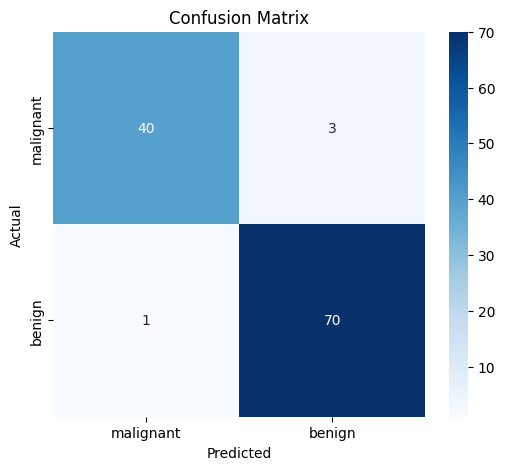

In [68]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [69]:
print("6. Stacking Classifier")

6. Stacking Classifier


In [70]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=1000))
]

In [71]:
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack), "\n")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Accuracy: 0.9649122807017544 



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print("7. Top 5 Important Features")

7. Top 5 Important Features


In [73]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
importances = rf_clf.feature_importances_
top5_idx = np.argsort(importances)[-5:][::-1]
for idx in top5_idx:
    print(f"{data.feature_names[idx]}: {importances[idx]:.4f}")
print()

worst area: 0.1539
worst concave points: 0.1447
mean concave points: 0.1062
worst radius: 0.0780
mean concavity: 0.0680



In [75]:
print("8. Bagging Classifier + Precision, Recall, F1")

8. Bagging Classifier + Precision, Recall, F1


In [76]:
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [77]:
print("Precision:", precision_score(y_test, y_pred_bag))
print("Recall:", recall_score(y_test, y_pred_bag))
print("F1-Score:", f1_score(y_test, y_pred_bag), "\n")


Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965 



In [78]:
print("9. Random Forest + Effect of max_depth")

9. Random Forest + Effect of max_depth


In [79]:
for depth in [2, 5, 10, None]:
    rf_temp = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf_temp.predict(X_test))
    print(f"max_depth={depth} => Accuracy: {acc:.4f}")
print()

max_depth=2 => Accuracy: 0.9649
max_depth=5 => Accuracy: 0.9649
max_depth=10 => Accuracy: 0.9649
max_depth=None => Accuracy: 0.9649



In [80]:
print("10. Bagging Regressor Comparison")

10. Bagging Regressor Comparison


In [82]:
base_estimators = [DecisionTreeRegressor(), KNeighborsRegressor()]
for est in base_estimators:
    bag_reg = BaggingRegressor(estimator=est, n_estimators=50, random_state=42)
    bag_reg.fit(X_train_r, y_train_r)
    mse = mean_squared_error(y_test_r, bag_reg.predict(X_test_r))
    print(f"{est.__class__.__name__} => MSE: {mse:.4f}")

DecisionTreeRegressor => MSE: 0.2573
KNeighborsRegressor => MSE: 1.0763
